In [1]:
import numpy as np
import pandas as pd     

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()
     


In [4]:
df.shape

(37249, 2)

In [5]:
df.sample()['clean_comment'].values

array([' happy customer care they capped doesn have movies prep and planned city much this one india and mace grind together all filled with priya brand the tea and cheap but have done the recipe understand the same one one adjoining style plus years your feet and fire magic '],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [7]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [11]:
df[df['clean_comment'].isnull()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(350)

In [16]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [17]:
df = df.drop_duplicates()

In [19]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [21]:
df=df[~(df['clean_comment'].str.strip() == '')]

In [23]:
df.loc[:,'clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [24]:
df[df['clean_comment'].apply(lambda x: x.endswith(" ") or x.startswith(" "))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [26]:
df.loc[:,'clean_comment'] = df['clean_comment'].str.strip()

In [27]:
df[df['clean_comment'].apply(lambda x: x.endswith(" ") or x.startswith(" "))]

,clean_comment,category


In [28]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,clean_comment,category


In [29]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,clean_comment,category


In [30]:
# remove new line characters
df.loc[:,'clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

# verfiy if new line characters are removed
df[df['clean_comment'].str.contains('\n', regex=True)]

,clean_comment,category


# EDA

Text(0.5, 1.0, 'Distribution of Comments by Category')

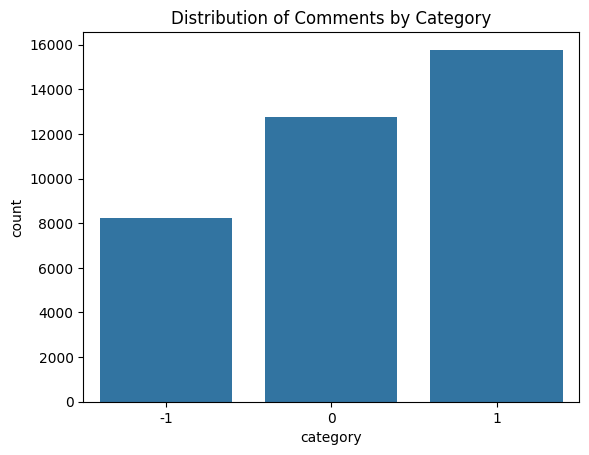

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='category', data=df)
plt.title('Distribution of Comments by Category')

In [32]:
df['category'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

category
 1    42.86%
 0    34.71%
-1    22.42%
Name: proportion, dtype: object

In [34]:
df.loc[:,'word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [35]:
df.sample(5)

,clean_comment,category,word_count
7827,pakistan must pissed decades supporting islami...,1,15
14002,fuck their goons regularly terrorise city frie...,-1,34
11213,kya chutiyapa hai yaar,0,4
22728,heejin and hyunjin both just did heejin nomina...,1,31
21721,wow india actually fucked,-1,4


In [36]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

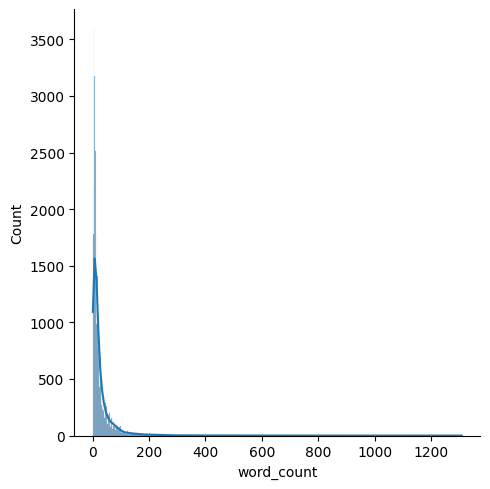

In [37]:
sns.displot(df['word_count'], kde=True)

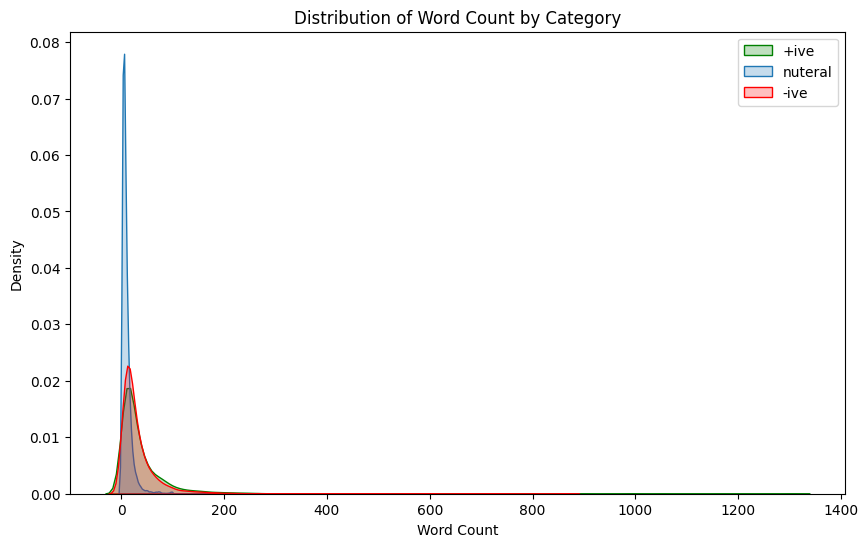

In [41]:
# create the figure ans axes
plt.figure(figsize=(10, 6))

# plot kde for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='+ive', color='green',fill=True)
# plot kde for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='nuteral',fill=True)
# plot kde for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='-ive', color='red',fill=True)
plt.title('Distribution of Word Count by Category')
plt.xlabel('Word Count')    
plt.ylabel('Density')
plt.legend()
plt.show()


**Positive comments (category 1)**: These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.<br>
**Neutral comments (category 0)**: The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.<br>
**Negative comments (category -1)**: These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

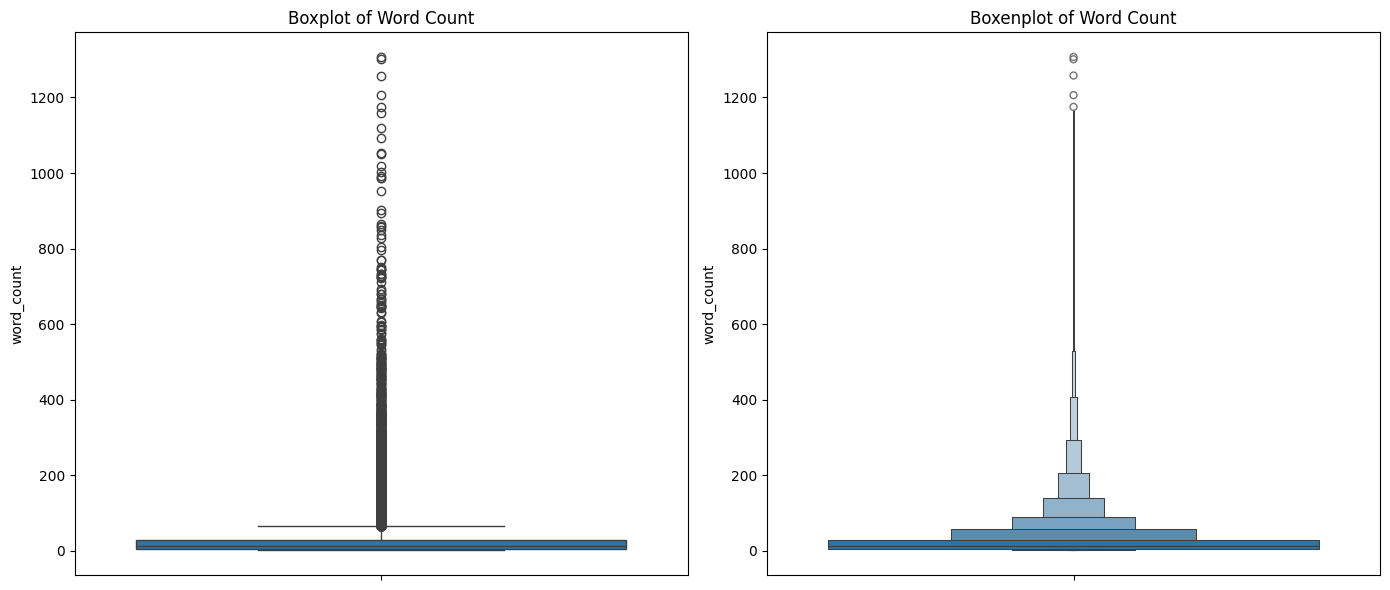

In [ ]:
# Create boxplot and boxenplot for word count
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

sns.boxplot(y=df['word_count'], ax=axes[0])
axes[0].set_title('Boxplot of Word Count')

sns.boxenplot(y=df['word_count'], ax=axes[1])
axes[1].set_title('Boxenplot of Word Count')

plt.tight_layout()
plt.show()

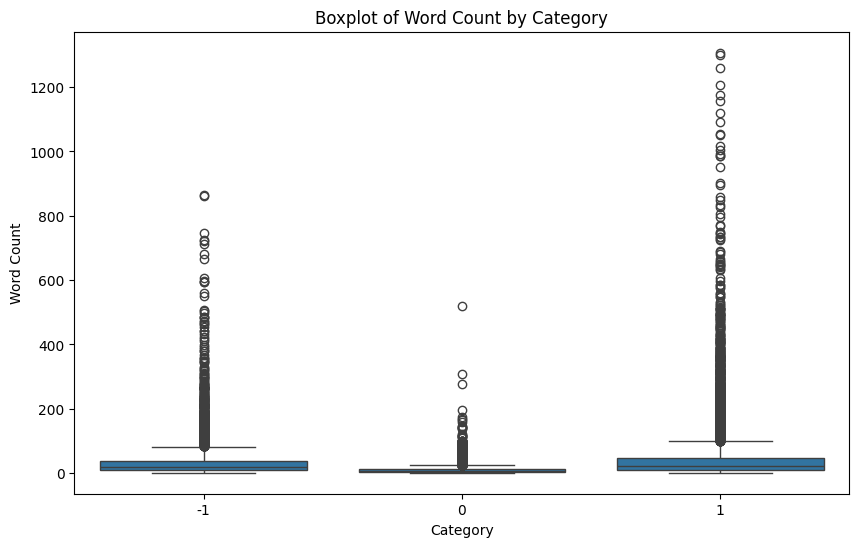

In [48]:
# create boxplot for the 'wordcount' column by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='word_count', data=df)
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

Positive comments (category 1): The median word count is relatively high, and there are several outliers with longer comments, indicating that positive comments tend to be more verbose. <br>
Neutral comments (category 0): The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter. <br>
Negative comments (category -1): The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers.

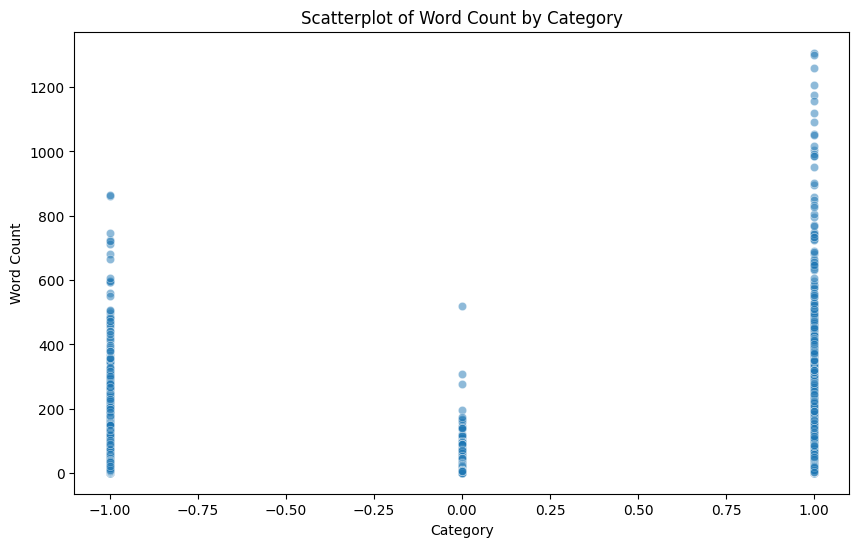

In [49]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

Text(0.5, 1.0, 'Median Word Count by Category')

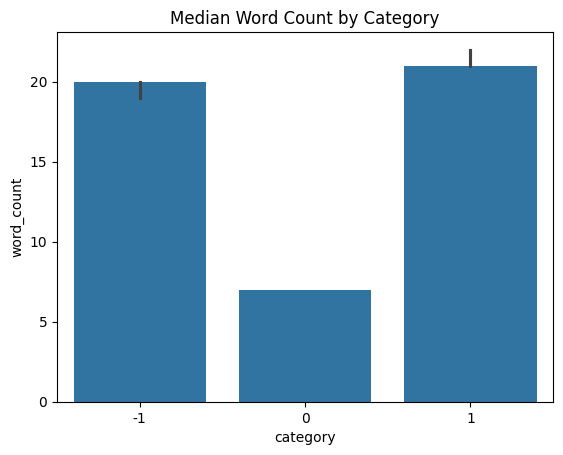

In [50]:
# median word counts among sentiments

sns.barplot(x='category', y='word_count', data=df, estimator=np.median)
plt.title('Median Word Count by Category')

In [52]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df.loc[:,'num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amrpu\AppData\Roaming\nltk_data...


[nltk_data]   Package stopwords is already up-to-date!


In [53]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
29607,azhar may have renal failure undergoes regular...,-1,10,1
7471,sue him for libel anything there should other ...,-1,11,5
36633,irony strong with this one,1,5,2
15718,could think that impairs the recipe for the gu...,0,40,14
26409,that the movie does well the box office most l...,1,11,6


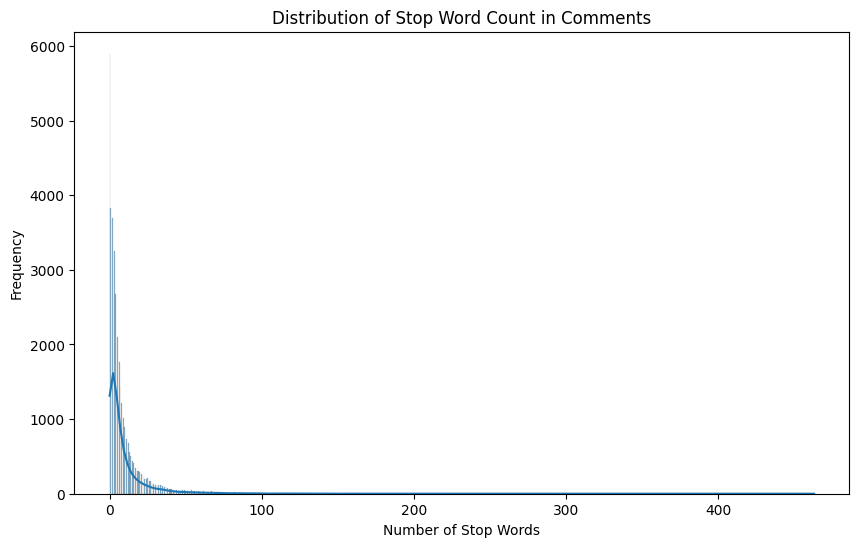

In [54]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

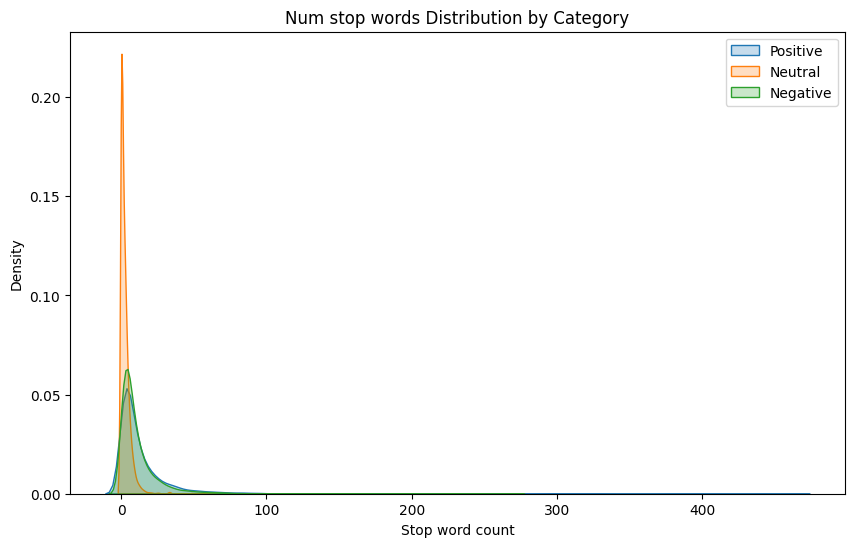

In [55]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

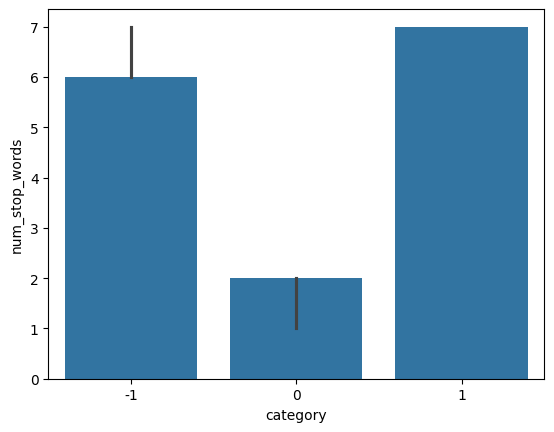

In [56]:
# median word counts among sentiments

sns.barplot(df,x='category',y='num_stop_words',estimator='median')

C:\Users\amrpu\AppData\Local\Temp\ipykernel_13344\101498387.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


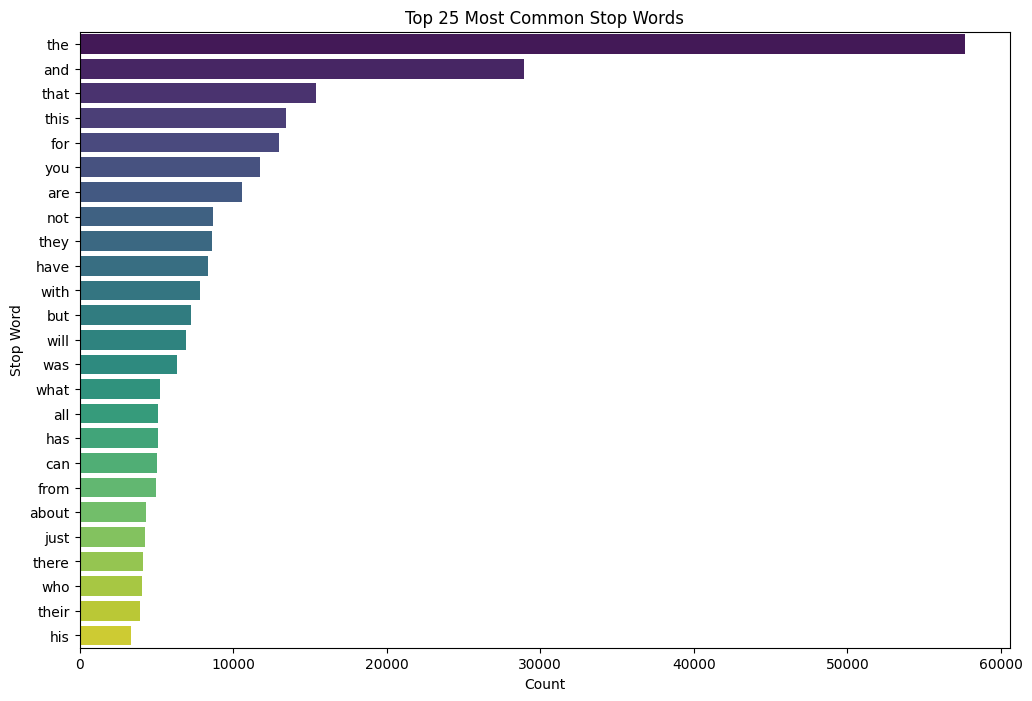

In [59]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()


In [60]:
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

C:\Users\amrpu\AppData\Local\Temp\ipykernel_13344\765264825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_chars'] = df['clean_comment'].apply(len)


,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [61]:
df['num_chars'].describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

In [62]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [64]:
char_frequency_df.head(10)

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [65]:
char_frequency_df.tail(50)

,character,frequency
1286,货,1
1287,语,1
1312,耐,1
1313,精,1
342,━,1
345,⊂,1
346,゜,1
347,ｊ,1
1289,显,1
1291,鞋,1


In [66]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

C:\Users\amrpu\AppData\Local\Temp\ipykernel_13344\4176698608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_punctuation_chars'] = df['clean_comment'].apply(


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
34790,really proud you guys for bringing this them t...,1,59,28,313,0
6664,have idea why people even twitter its cess pit,0,9,3,46,0
4800,notsureifgusta apparently arnab will make deba...,-1,14,6,90,0
8691,khamma gadhi padharo mahre des,0,5,0,31,0
3296,now the magni uber something can use,0,7,3,36,0


In [67]:
df['num_punctuation_chars'].describe()

count    36793.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

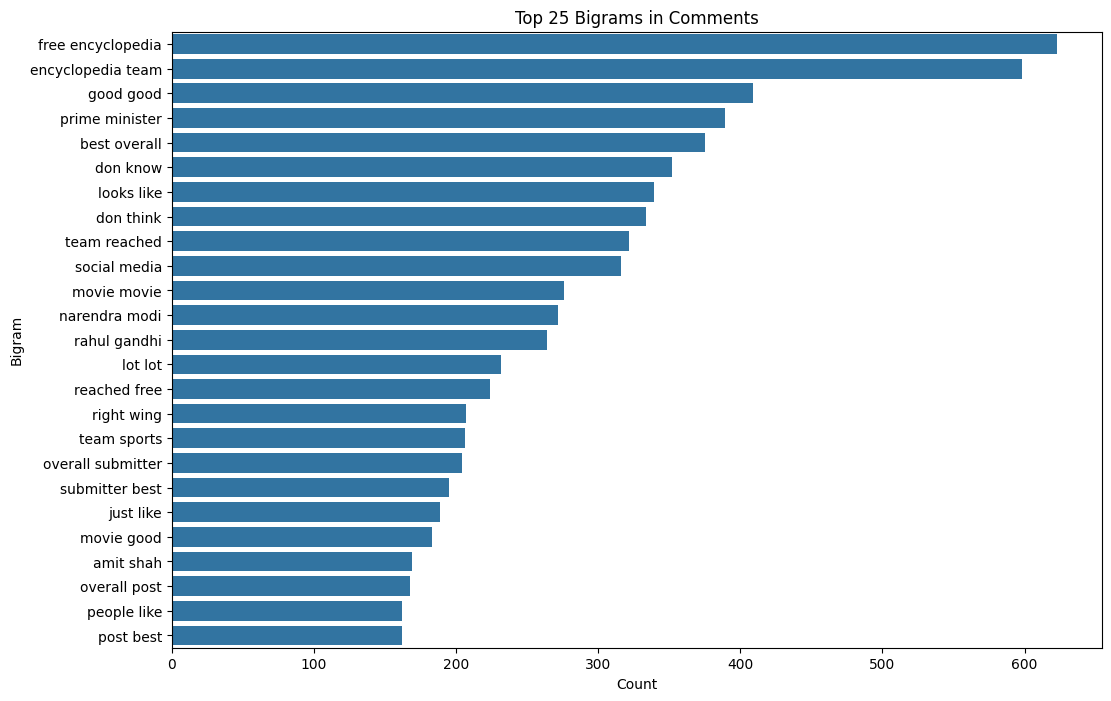

In [81]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(df['clean_comment'])
bag_of_words = vec.transform(df['clean_comment'])
sum_words = bag_of_words.sum(axis=0)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(vec.get_feature_names_out(), columns=['bigram']).assign(count=sum_words.A1).sort_values(by='count', ascending=False).head(25)

# Create a barplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram')
plt.title('Top 25 Bigrams in Comments') 
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

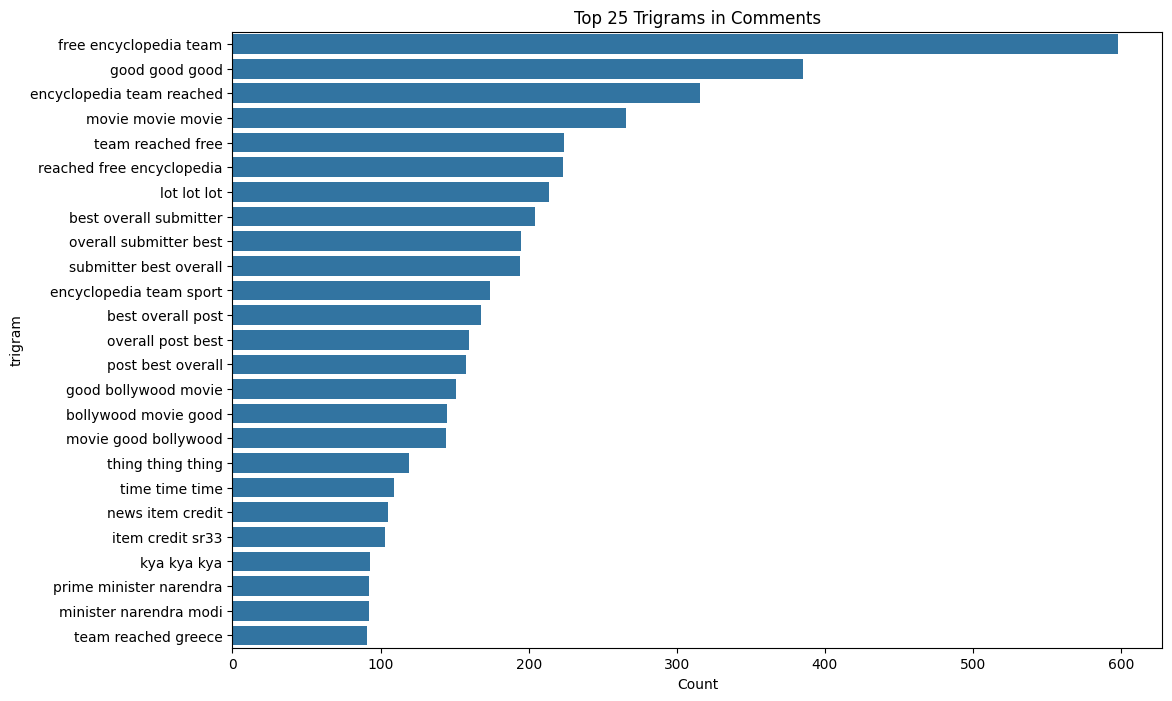

In [99]:
# Create a function to extract the top 25 trigrams
vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(df['clean_comment'])
bag_of_words = vec.transform(df['clean_comment'])
sum_words = bag_of_words.sum(axis=0)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(vec.get_feature_names_out(), columns=['trigram']).assign(count=sum_words.A1).sort_values(by='count', ascending=False).head(25)

# Create a barplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='trigram')
plt.title('Top 25 Trigrams in Comments') 
plt.xlabel('Count')
plt.ylabel('trigram')
plt.show()

In [84]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df.loc[:,'clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [85]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [87]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df.loc[:,'clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)


In [88]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [90]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df.loc[:,'clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amrpu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


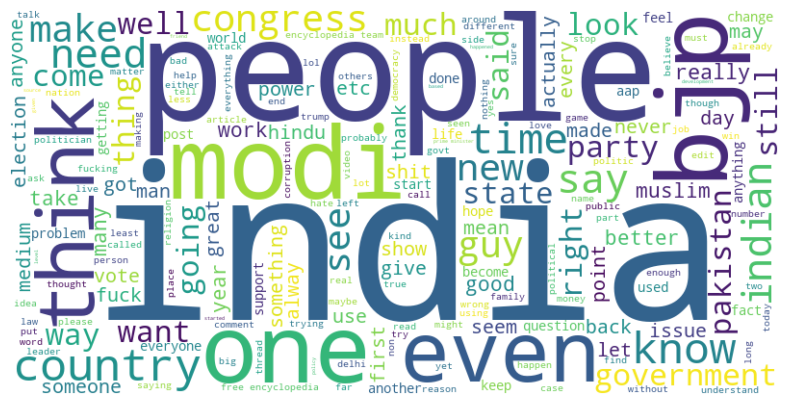

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])

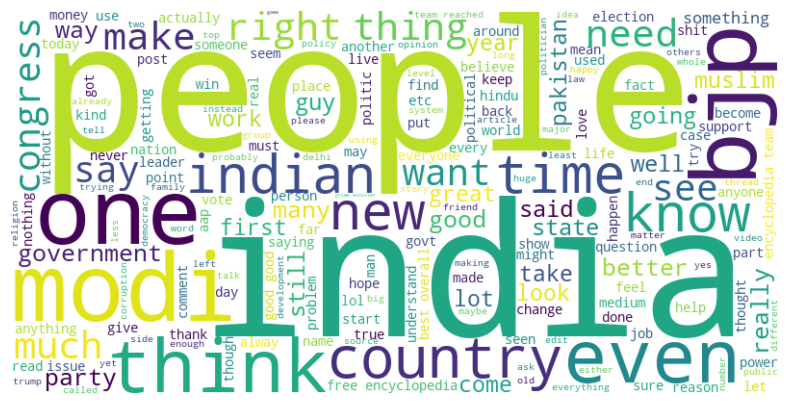

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

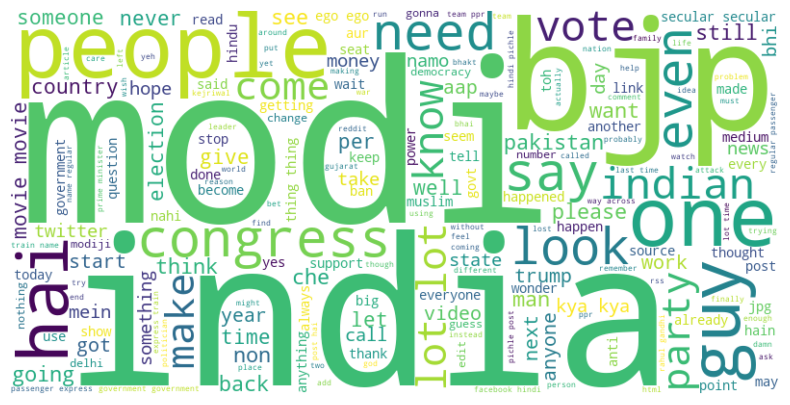

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 0]['clean_comment'])

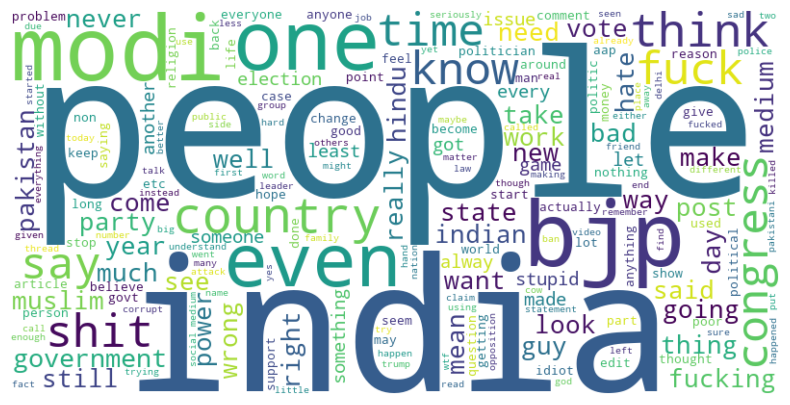

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == -1]['clean_comment'])

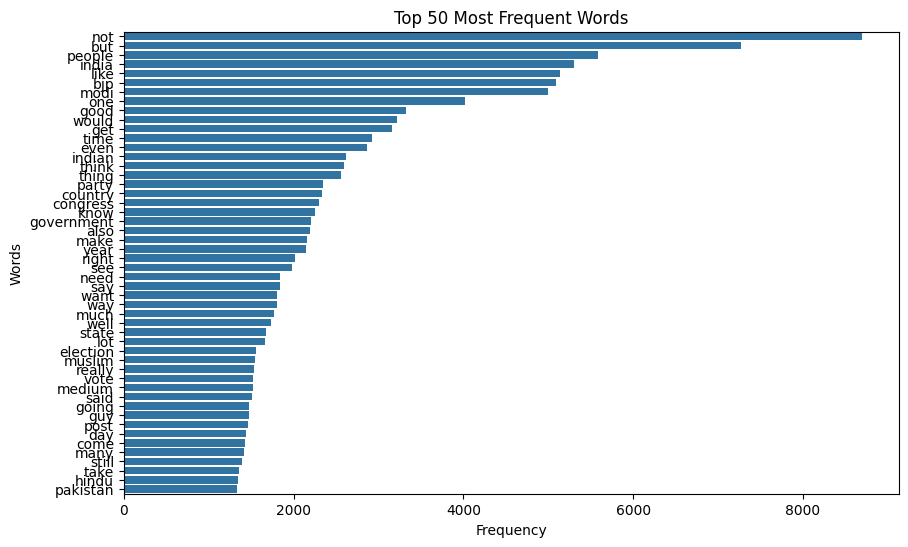

In [95]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)

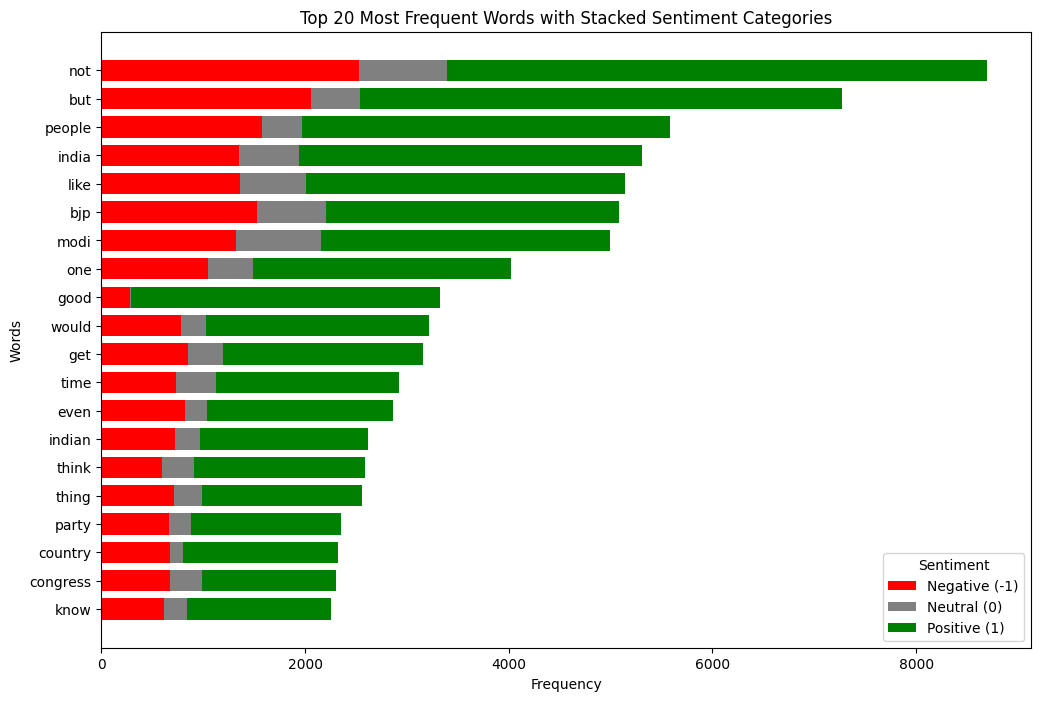

In [96]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)
